# Load Data 

In [2]:
import glob, os 
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# path to dataset. Load all images in the folder
path="images_bees/"
imlist= glob.glob(os.path.join(path, '*.jpg'))
imlist

['images_bees/NP10057-126r.jpg',
 'images_bees/NP10109-128r.jpg',
 'images_bees/NP10154-130r.jpg',
 'images_bees/NP10304-132r.jpg',
 'images_bees/NP1034-9r.jpg',
 'images_bees/NP10536-27r.jpg',
 'images_bees/NP10546-134r.jpg',
 'images_bees/NP10566-136r.jpg',
 'images_bees/NP10604-138r.jpg',
 'images_bees/NP10623-139r.jpg',
 'images_bees/NP10660-141r.jpg',
 'images_bees/NP10710-143r.jpg',
 'images_bees/NP10848-144r.jpg',
 'images_bees/NP10861-146r.jpg',
 'images_bees/NP11139-148r.jpg',
 'images_bees/NP11180-150r.jpg',
 'images_bees/NP11290-152r.jpg',
 'images_bees/NP11339-154r.jpg',
 'images_bees/NP11354-156r.jpg',
 'images_bees/NP1149-11r.jpg',
 'images_bees/NP11553-158r.jpg',
 'images_bees/NP11660-159r.jpg',
 'images_bees/NP11681-161r.jpg',
 'images_bees/P1268-14r.jpg',
 'images_bees/P12708-39r.jpg',
 'images_bees/P12823-180r.jpg',
 'images_bees/P12828-40r.jpg',
 'images_bees/P12835-182r.jpg',
 'images_bees/P12891-184r.jpg',
 'images_bees/P12922-186r.jpg',
 'images_bees/P12940-188r.j

In [5]:
def dataset(file_list,size=(180,300),flattened=False):  
    '''
    Function to create a dataset. It will load all the images into a np.array 
    
    Parameters: 
    
    - file_list: List of all the images you want to include in the dataset. 
    - Size : Size of the images, by default is 180x300 which is the original size. 
    - flattened: By default is False. Creates a dataset, but each image get converted into a big vector. 
    
    Output: 
    
    data: it outputs the dataset as a big np array 
    labels : It outputs the binary label. 1 for pollen 0 for non pollen. 
    
    '''
    data = []
    for i, file in enumerate(file_list):
        
        image = cv.imread(file)
        image2 = cv.cvtColor(image, cv.COLOR_RGB2BGR)
        image = cv.resize(image2, size)
        if flattened:
            image = image.flatten()

        data.append(image)

    labels = [1 if f.split("/")[-1][0] == 'P' else 0 for f in file_list]

    return np.array(data), np.array(labels)

In [6]:
X,Y=dataset(imlist)

In [7]:
%matplotlib inline 

Text(0.5, 1.0, '0')

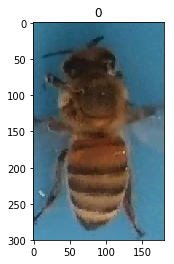

In [8]:
#Example of a image in the dataset with its label. 
plt.imshow(X[0])
plt.title(Y[0])

In [9]:
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
import numpy as np
import os
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop

tf.__version__

Using TensorFlow backend.


'1.13.1'